In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from stable_baselines3 import PPO
from rich import inspect

In [6]:
model = PPO.load("/scratch/hpc-prf-intexml/tklenke/repos/dacboenv/runs_ppo/PPO-norm-Perceptron/DACBO/dacbo_Cepisode_length_scaled_plus_logregret_AUCB-cont_Ssmart_Repisode_finished_scaled_Ibbob2d_3seeds/2/model")
model = PPO.load("runsicml/PPO-AlphaNet/DACBO/dacbo_Csymlogregret_AWEI-cont_Ssawei_Rsymlogregret-SMAC3-BlackBoxFacade_Ibbob2d_3seeds/3/rl_model_1232000_steps.zip")

In [7]:
# inspect(model.policy, all=True)
print(model.policy)
import matplotlib.pyplot as plt
import seaborn as sns
for name, param in model.policy.named_parameters():
    if "value" not in name:
        print(name, param.shape, param)
        # if name == "mlp_extractor.policy_net.0.weight":
        #     sns.heatmap(param.detach().numpy())
        #     plt.show()

MultiInputActorCriticPolicy(
  (features_extractor): CombinedExtractor(
    (extractors): ModuleDict(
      (acq_value_PI): Flatten(start_dim=1, end_dim=-1)
      (acq_value_WEI_explore): Flatten(start_dim=1, end_dim=-1)
      (previous_param): Flatten(start_dim=1, end_dim=-1)
      (ubr_smoothed_gradient): Flatten(start_dim=1, end_dim=-1)
    )
  )
  (pi_features_extractor): CombinedExtractor(
    (extractors): ModuleDict(
      (acq_value_PI): Flatten(start_dim=1, end_dim=-1)
      (acq_value_WEI_explore): Flatten(start_dim=1, end_dim=-1)
      (previous_param): Flatten(start_dim=1, end_dim=-1)
      (ubr_smoothed_gradient): Flatten(start_dim=1, end_dim=-1)
    )
  )
  (vf_features_extractor): CombinedExtractor(
    (extractors): ModuleDict(
      (acq_value_PI): Flatten(start_dim=1, end_dim=-1)
      (acq_value_WEI_explore): Flatten(start_dim=1, end_dim=-1)
      (previous_param): Flatten(start_dim=1, end_dim=-1)
      (ubr_smoothed_gradient): Flatten(start_dim=1, end_dim=-1)
    )


In [8]:
model.policy.features_extractor


CombinedExtractor(
  (extractors): ModuleDict(
    (acq_value_PI): Flatten(start_dim=1, end_dim=-1)
    (acq_value_WEI_explore): Flatten(start_dim=1, end_dim=-1)
    (previous_param): Flatten(start_dim=1, end_dim=-1)
    (ubr_smoothed_gradient): Flatten(start_dim=1, end_dim=-1)
  )
)

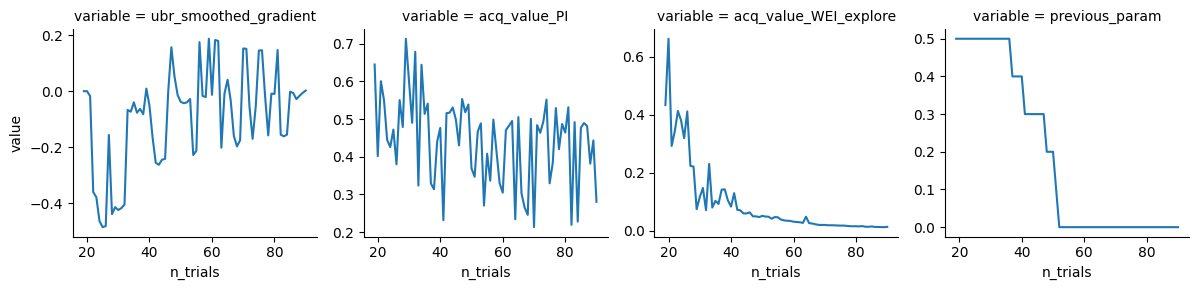

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from carps.analysis.gather_data import read_jsonl_content

fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/BBOB/bbob/2/1/0/1/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/YAHPO/yahpo/so/nb301/CIFAR10/None/1/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/YAHPO/yahpo/so/nb301/CIFAR10/None/3/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI-P/BNNBO/bnnbo/TensionCompressionString/3/DACBOEnvLogs.jsonl"
obs = read_jsonl_content(fn)
obs_orig = obs.copy()
obs_keys = list(obs.iloc[0]["observation"].keys())
expanded = obs["observation"].apply(pd.Series)
expanded.columns = obs_keys
obs = obs.drop(columns="observation").join(expanded)
# obs["exploring"] = obs["acq_value_PI"] <= obs["acq_value_WEI_explore"]
# obs["diff_EI"] = obs["acq_value_EI"] - obs["acq_value_WEI_explore"]
# obs["diff"] = obs["acq_value_EI"] - obs["acq_value_WEI_explore"]
obs_wide = obs.copy()
obs = obs.melt(id_vars=["n_trials"], value_vars=obs_keys)


grid = sns.FacetGrid(data=obs, col="variable", col_wrap=5, sharex=True, sharey=False)
grid.map_dataframe(sns.lineplot, x="n_trials", y="value")
# grid.axes.flat[-2].set_yscale("log")
plt.show()

In [13]:
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from omegaconf import OmegaConf
from hydra.utils import instantiate
import dacboenv

config_fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runsicml/PPO-AlphaNet/DACBO/dacbo_Csymlogregret_AWEI-cont_Ssawei_Rsymlogregret-SMAC3-BlackBoxFacade_Ibbob2d_3seeds/3/.hydra/config.yaml"
normalization_wrapper = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runsicml/PPO-AlphaNet/DACBO/dacbo_Csymlogregret_AWEI-cont_Ssawei_Rsymlogregret-SMAC3-BlackBoxFacade_Ibbob2d_3seeds/3/rl_model_vecnormalize_1232000_steps.pkl"

config = OmegaConf.load(config_fn)
config.dacboenv.evaluation_mode = True
env = instantiate(config.dacboenv)
env.reset()
vec_env = DummyVecEnv([lambda: env])
vec_env = VecNormalize.load(normalization_wrapper, vec_env)
vec_env.training = False
vec_env.norm_reward = False


[20:43:25] INFO     Env is in evaluation mode! This means that a reward is not calculated, and      ]8;id=601392;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/dacboenv/dacboenv.py\dacboenv.py]8;;\:]8;id=280058;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/dacboenv/dacboenv.py#173\173]8;;\
                    episodes will be full length.                                                                  

[20:43:25] INFO     SMAC(internal): Reducing the number of initial configurations     ]8;id=895423;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/initial_design/abstract_initial_design.py\abstract_initial_design.py]8;;\:]8;id=669786;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/initial_design/abstract_initial_design.py#91\91]8;;\
                    from 16 to 15 (max_ratio == 0.2).                                                              

[20:43:25] WARNING  SMAC(internal): The argument budget is not set by SMAC: Consider   ]8;id=69847;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/runner/target_function_runner.py\target_function_runner.py]8;;\:]8;id=430400;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/runner/target_function_runner.py#74\74]8;;\
                    removing it from the target function.                                                          

           WARNING  SMAC(internal): The argument instance is not set by SMAC: Consider ]8;id=447890;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/runner/target_function_runner.py\target_function_runner.py]8;;\:]8;id=806136;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/runner/target_function_runner.py#74\74]8;;\
                    removing it from the target function.                                                          

           WARNING  SMAC(internal): The argument cutoff is not set by SMAC: Consider   ]8;id=634376;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/runner/target_function_runner.py\target_function_runner.py]8;;\:]8;id=644384;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/runner/target_function_runner.py#74\74]8;;\
                    removing it from the target function.                                                          

           INFO     SMAC(internal): Using 15 initial design configurations and 0     ]8;id=614858;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/initial_design/abstract_initial_design.py\abstract_initial_design.py]8;;\:]8;id=347030;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/initial_design/abstract_initial_design.py#143\143]8;;\
                    additional configurations.                                                                     

{'ubr_smoothed_gradient': 0.0, 'acq_value_PI': 0.6449588537216187, 'acq_value_WEI_explore': 0.43361109495162964, 'previous_param': 0.5}
{'ubr_smoothed_gradient': array([0.11593609], dtype=float32), 'acq_value_PI': array([1.3114637], dtype=float32), 'acq_value_WEI_explore': array([-0.10404848], dtype=float32), 'previous_param': array([0.2351895], dtype=float32)}


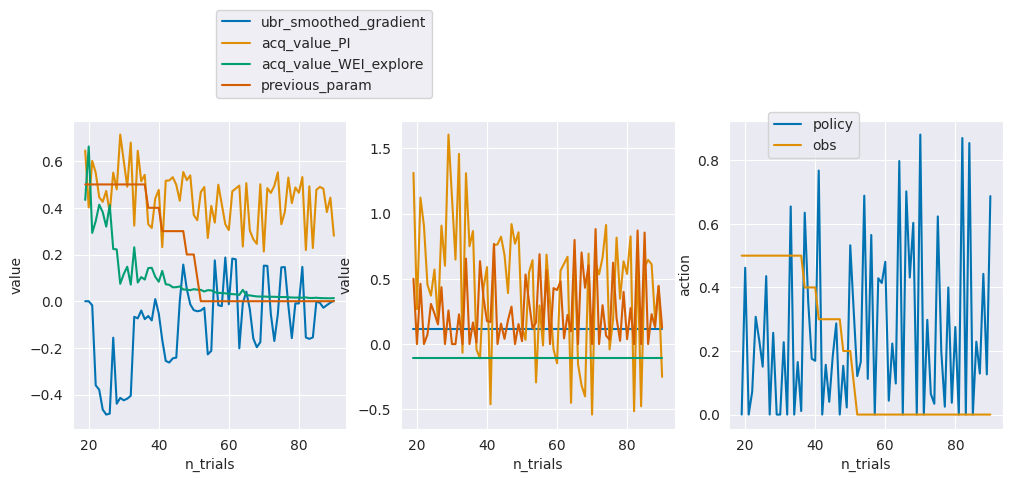

In [76]:

sns.set_style("darkgrid")
sns.set_palette("colorblind")

data = []
a = 0.5
for _idx, row in obs_orig.iterrows():
    o_un = row["observation"]
    o = vec_env.normalize_obs(o_un)


    # o = {k: np.array([v]) for k,v in o_un.items()}



    # o = {
    #     "ubr_smoothed_gradient": o["ubr_smoothed_gradient"],
    #     "acq_value_WEI_explore": o["acq_value_WEI_explore"],
    #     "acq_value_PI": o["acq_value_PI"],
    #     "previous_param": o["previous_param"],
    # }

    # o = {
    #     "ubr_smoothed_gradient": o["ubr_smoothed_gradient"],
    #     "acq_value_WEI_explore": o["acq_value_WEI_explore"],
    #     "acq_value_PI": o["acq_value_PI"],
    #     "previous_param": np.array([0]),
    # }

    o = {
        "ubr_smoothed_gradient": o["ubr_smoothed_gradient"],
        "acq_value_WEI_explore": o["acq_value_WEI_explore"],
        "acq_value_PI": o["acq_value_PI"],
        "previous_param": np.array([a]),
    }

    # o = {
    #     "ubr_smoothed_gradient": np.array([0]), #o["ubr_smoothed_gradient"],
    #     "acq_value_WEI_explore": np.array([0]), #o["acq_value_WEI_explore"],
    #     "acq_value_PI":  np.array([0]), #o["acq_value_PI"],
    #     "previous_param": o["previous_param"],
    # }


    a = model.predict(o, deterministic=True)[0][0]
    o = {k: v[0] for k, v in o.items()}
    data.append({
        "obs": o_un,
        "obs_norm": o,
        "action": a,
        "n_trials": row["n_trials"]
    })
data = pd.DataFrame(data)

obs_keys = list(obs_orig.iloc[0]["observation"].keys())

data_obs = data["obs"].apply(pd.Series)
data_obs["n_trials"] = data["n_trials"]
data_obs_orig = data_obs.copy()
data_obs = data_obs.melt(id_vars=["n_trials"], value_vars=obs_keys)

data_obs_norm = data["obs_norm"].apply(pd.Series)
data_obs_norm["n_trials"] = data["n_trials"]
data_obs_norm = data_obs_norm.melt(id_vars=["n_trials"], value_vars=obs_keys)

fig = plt.figure(figsize=(12, 4))
axes = fig.subplots(nrows=1, ncols=3)

ax = axes[0]
ax = sns.lineplot(data=data_obs, x="n_trials", y="value", hue="variable", ax=ax)
ax.legend(bbox_to_anchor=(0.5, 1.05))

ax = axes[1]
ax = sns.lineplot(data=data_obs_norm, x="n_trials", y="value", hue="variable", ax=ax)
ax.legend().remove()

ax = axes[2]
ax = sns.lineplot(data=data, x="n_trials", y="action", ax=ax, label="policy")
ax.plot(data["n_trials"], data_obs_orig["previous_param"], label="obs")
ax.legend(bbox_to_anchor=(0.5, 1.05))

plt.show()
